In [26]:
# activate package, basic imports + load data
include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_fixtures.jl")
include("/Users/federicoclaudi/Documents/Github/LocomotionControl/analysis/behavior/analysis_visuals.jl")

# include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_fixtures.jl")
# include("C:\\Users\\Federico\\Documents\\GitHub\\pysical_locomotion\\analysis\\behavior\\analysis_visuals.jl")

# using HypothesisTests
using Random , GLM

import jcontrol: movingaverage
import jcontrol as jc


  Activating project at `~/Documents/Github/LocomotionControl/analysis/behavior`


@Info (Main):  Loaded 995 trials 
  ╰──────────────────────────────────────────────── 
                      Thu, 07 Jul 2022 12:45:08 
@Info (Main):  After tortuosity analysis, discarded 8.643% of trials | 909 

 
  │                trials left 
  ╰──────────────────────────────────────────────── 
                      Thu, 07 Jul 2022 12:45:09 


### Get average duration, speed

In [28]:
speed = vcat(getfield.(trials, :speed)...)
println(mean(speed), "  ", std(speed))
percentile(speed, 99.9)

43.16553520249983  17.65936403642523


91.90622705875175

In [29]:
D = getfield.(trials, :duration)
println(mean(D), "  ", std(D))

5.988173817381737  0.9464432424418993


In [30]:
fast = length(
    findall(D .< 5)
)
N = length(trials)

fast / N * 100

12.761276127612762

get the average fraction of track covered by each trial.

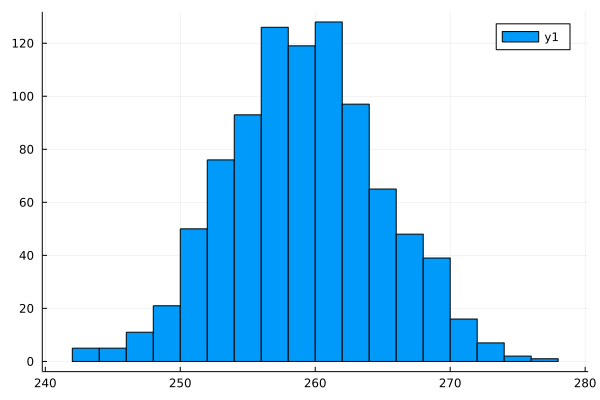

In [31]:
# Δs = map(
#     s->s[end]-s[1], S
# )

Δs = map(
    s->sum(s)/60, getfield.(trials, :speed)
)

histogram(Δs, nbins=25)


In [32]:
max(map(s->max(s...), S)...)
min(map(s->min(s...), S)...)

0.7169179465050783

In [33]:
println(mean(Δs))
std(Δs)

259.20215329958756


5.675881453417215

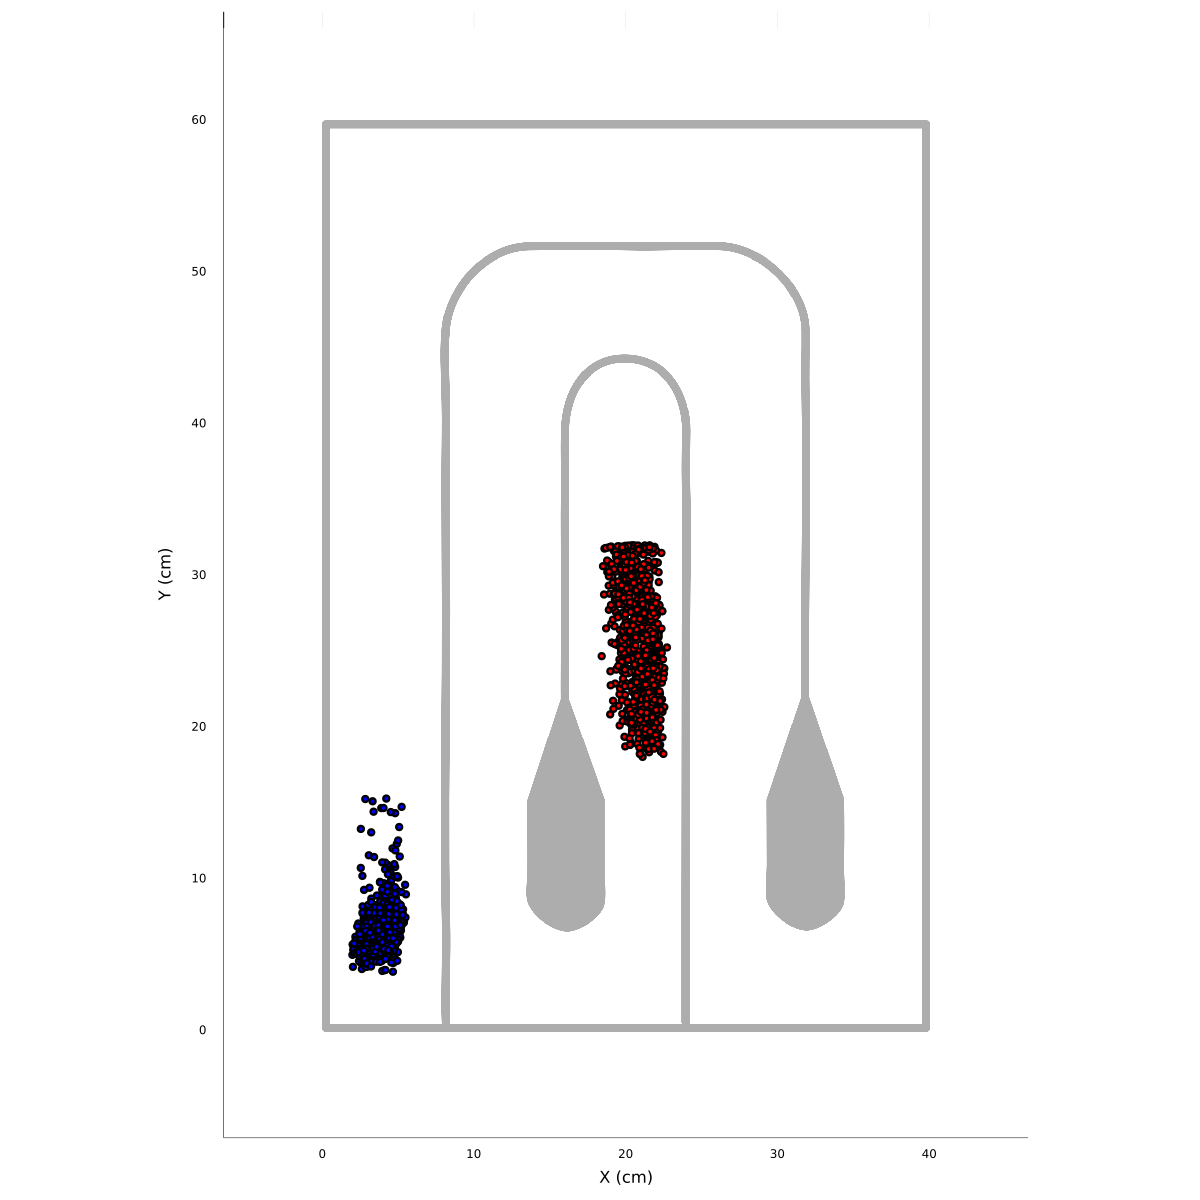

In [34]:
p = plot()
draw!(:arena)
for trial in trials
    scatter!([trial.x[1]], [trial.y[1]], color="red", label=nothing)
    scatter!([trial.x[end]], [trial.y[end]], color="blue", label=nothing)

end

p

## Get model speed etc

In [45]:
gs = load_global_solution()

t = length(gs.t) * 0.01

4.8100000000000005

In [46]:
faster = length(findall(D .< t))
faster / length(D) * 100

6.9306930693069315